1. **Understand Classification Types**

Read about Binary Classification, Multi-class Classification, and Multi-label Classification.
Write a brief explanation of each type with an example.

* **Binary Classification**
This involves classifying data points into two distinct categories.
  
  -> *Example:* A model that identifies whether an email is "spam" or "not spam", or classifies images as "cat" vs "dog".

* **Multi-class Classification**
Here, each input is assigned to one class among three or more possible categories.
  
  -> *Example:* Classifying images into "dog", "cat", "bird", or "fish". The model picks only one.

* **Multi-label Classification**
In this case, an input can belong to multiple classes at the same time.
  
  -> *Example:* An image of an owl might be labeled as both "bird" and "nocturnal".
This is common in tagging systems for text, audio, or images (like assigning genres to a song or hashtags to a post).

These classification types apply across domains: images, texts, sounds, medical data, etc.

2. **Set Up Your Python Environment and dataset**

* Ensure you have the required libraries installed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

* It is time for creating a dataset to work on:

In [2]:
from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


y :  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1

* Visualize the dataset using scatter plots to understand the data distribution.

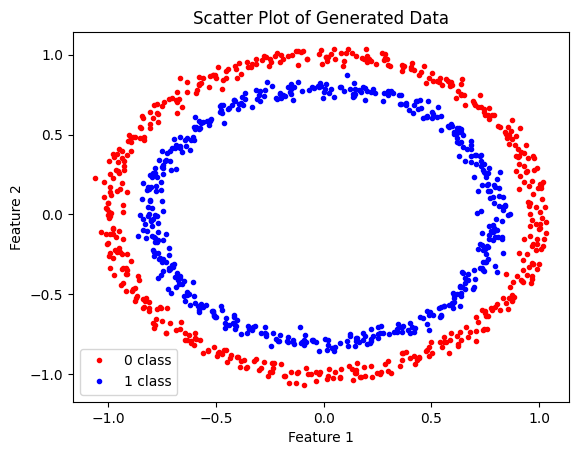

In [3]:
plt.plot(X[y==0, 0], X[y==0, 1], 'r.', label = '0 class')
plt.plot(X[y==1, 0], X[y==1, 1], 'b.', label = '1 class')
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3. **Build a Basic Neural Network Model**

* Create a Sequential Model in TensorFlow with one dense layer.
* Use Binary Crossentropy as the loss function.
* Train the model and check the accuracy.


In [4]:
from tensorflow import keras

model1 = tf.keras.Sequential([
    keras.layers.Dense(1,                         # 1 output: 1 neuron is enough to say class 0 or class 1
                       input_shape = (2,),        # 2 features for each entrance
                       activation = 'sigmoid')    # sigmoid for proba between 0 and 1
])

model1.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model1.fit(X, y, epochs = 100)

model1.evaluate(X, y)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5258 - loss: 0.7414
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4736 - loss: 0.7928 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5326 - loss: 0.7419 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - loss: 0.7483 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 0.7564 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4999 - loss: 0.7519
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 0.7488
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.7406
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 0.7331 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4938 - loss: 0.7375
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4891 - loss: 0.7442 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

[0.6932687759399414, 0.49900001287460327]

4. **Improve the Model**

* Add more layers and neurons to the model.
* Train the model for more epochs.
* Try different optimizers like Adam instead of SGD.

In [5]:
model2 = tf.keras.Sequential([
    keras.layers.Dense(8, input_shape=(2,), activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model2.fit(X, y, epochs = 200)

model2.evaluate(X, y)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5006 - loss: 0.7204
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 0.6980
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 0.6927
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.6900
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5686 - loss: 0.6914
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5127 - loss: 0.6908
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 0.6881
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6212 - loss: 0.6852
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.6874
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 0.6859
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5882 - loss: 0.6864
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6155 - lo

[0.16507647931575775, 0.9950000047683716]

5. **Visualize the Decision Boundary**

* Implement a function plot_decision_boundary() to visualize model predictions.
* Plot decision boundaries for different models and compare results.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step


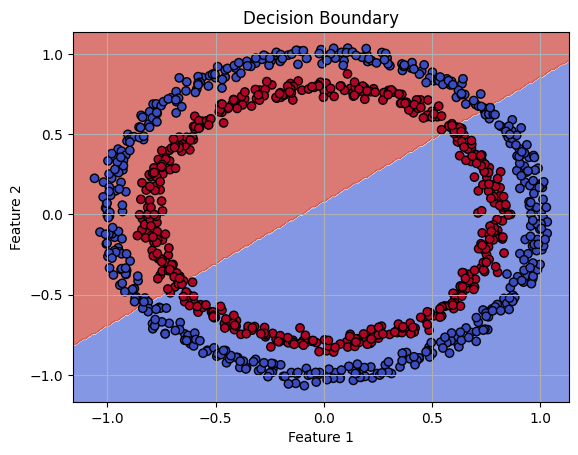

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


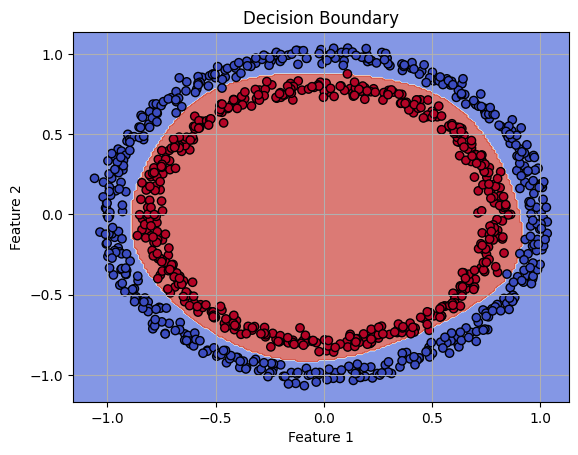

In [6]:
def plot_decision_boundary(model, X, y):
    # Define the boundaries of the plot based on the data
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a dense grid of points covering the feature space
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)      # it's what is colored in the background
    )                                       # 200 lines and 200 columns -> 40 000 points with (x,y) coordinate


    # Flatten the grid into shape (num_points, 2) for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict the class for each point in the grid
    preds = model.predict(grid)
    preds = np.round(preds).reshape(xx.shape)  # Reshape for contour plot

    # Plot the decision boundary as filled contours
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.7)

    # Plot the original data points with labels
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model1, X, y)
plot_decision_boundary(model2, X, y)

6. **Incorporate Activation Functions**

* Explore ReLU and Sigmoid activation functions.
* Modify the neural network to include these activation functions.
* Train the new model and compare performance.


In [7]:
model3 = tf.keras.Sequential([
    keras.layers.Dense(8, input_shape=(2,), activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model3.fit(X, y, epochs = 200)

model3.evaluate(X, y)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4994 - loss: 0.6984
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 0.6968
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4736 - loss: 0.6945
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5066 - loss: 0.6932
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 0.6921
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5294 - loss: 0.6915
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 0.6918
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5262 - loss: 0.6908
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 0.6916
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 0.6906
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 0.6922
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5441 - lo

[0.01372463721781969, 1.0]

By introducing ReLU activation in the hidden layers and keeping a sigmoid output for binary classification, the model learned the decision boundary more effectively. The loss dropped significantly from ~0.16 to ~0.02, showing that the model is now much more confident in its predictions, while maintaining perfect accuracy.

7. **Split Data into Training and Testing Sets**

* Use 80% data for training and 20% for testing.
* Train the improved model on the training set.
* Evaluate model performance on the test set.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model4 = tf.keras.Sequential([
    keras.layers.Dense(8, input_shape=(2,), activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model4.fit(X_train, y_train,
                     epochs = 200,
                     validation_data = (X_test, y_test))

model4.evaluate(X_test, y_test)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5182 - loss: 0.7113 - val_accuracy: 0.4200 - val_loss: 0.7058
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4666 - loss: 0.7073 - val_accuracy: 0.4200 - val_loss: 0.7018
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4752 - loss: 0.6986 - val_accuracy: 0.4500 - val_loss: 0.7001
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4806 - loss: 0.6984 - val_accuracy: 0.4850 - val_loss: 0.6981
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4884 - loss: 0.6986 - val_accuracy: 0.4850 - val_loss: 0.6968
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4899 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4945 - loss: 0.6978 - val_accuracy: 0.4900 - val_loss: 0.6955
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4815 - loss: 0.6968 - val_accuracy: 0.4750 - val_loss: 0.

[0.10012438148260117, 0.9950000047683716]

8. **Evaluate and Visualize Final Model Performance**

* Check loss and accuracy on the test set.
* Use plot_decision_boundary() to visualize predictions for both training and test data.
* Compare results and analyze improvements.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9973 - loss: 0.0965 
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


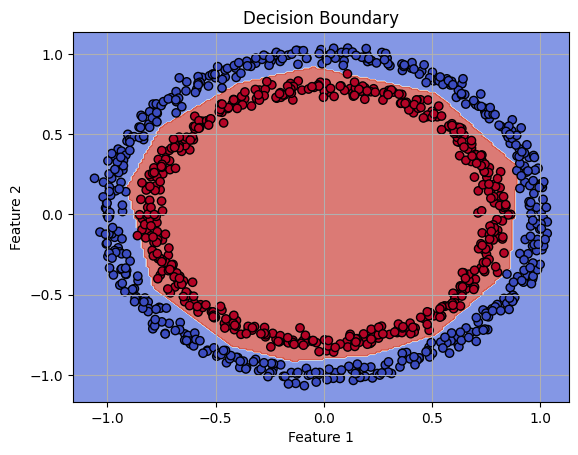

In [9]:
# Check loss and accuracy on the test set.
model4.evaluate(X_test, y_test)

# Use plot_decision_boundary() to visualize predictions for both training and test data.
plot_decision_boundary(model4, X, y)

After splitting the data into training and test sets, the improved model maintained high accuracy on both sets, confirming better generalization. The decision boundary is now smoother and accurately separates the two classes, showing that the architecture and training strategy significantly improved model performance.

9. **Summarize Key Takeaways**

* Write a short summary of what you learned.
* Highlight the importance of visualizing data and tuning hyperparameters to improve classification models.

Throughout this exercise, I learned how to build and improve a neural network for binary classification using TensorFlow. I saw how important it is to visualize data early to understand its structure, and how tuning model architecture (layers, neurons, activations) and hyperparameters (optimizer, epochs) can significantly boost performance. Visualizing the decision boundary helped me grasp how the model learns to separate classes. In the end, careful design and evaluation led to a model that generalizes well to unseen data.

